In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8224057555198669, 'full_set_var_values': [0.03258544206619263, 0.0243424903601408, 0.022389071062207222, 0.021753964945673943, 0.020729878917336464, 0.02046944946050644, 0.018140874803066254, 0.01667787693440914, 0.01640338823199272, 0.015645837411284447, 0.015251335687935352, 0.014367583207786083, 0.013927459716796875, 0.013616828247904778, 0.013291705399751663, 0.012499464675784111, 0.012226635590195656, 0.011992496438324451, 0.011667725630104542, 0.011183063499629498, 0.010987082496285439, 0.01083043310791254, 0.01073733251541853, 0.010216418653726578, 0.010047666728496552, 0.009813353419303894, 0.009594850242137909, 0.009564639069139957, 0.009209029376506805, 0.009136578999459743, 0.008980870246887207, 0.008830154314637184, 0.008677714504301548, 0.008488336578011513, 0.008284256793558598, 0.00819295272231102, 0.008139751851558685, 0.007958653382956982, 0.007794528733938932, 0.0076179602183401585, 0.007471275050193071, 0.007434659637510776

In [5]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']

In [11]:
r2_values = variance_metrics['r2_values']
mn = min(variance_metrics['r2_values'])
mx = max(variance_metrics['r2_values'])

norm = mx - mn

scaled_r2_values = [(val - mn)/norm for val in r2_values]
scaled_r2_values

[0.0,
 0.5598834978480204,
 0.7389231226049839,
 0.822220558720473,
 0.8902581931076741,
 0.9304725825654443,
 0.941700213671465,
 0.9691647051332661,
 0.9933464327852077,
 1.0]

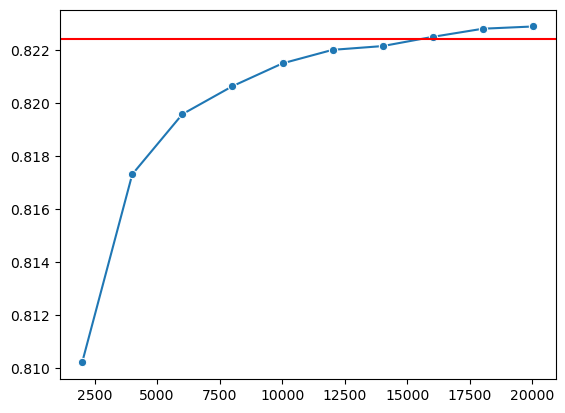

In [6]:
graph = sns.lineplot(x=variance_metrics['subset_sizes'], y=variance_metrics['r2_values'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')
plt.show()

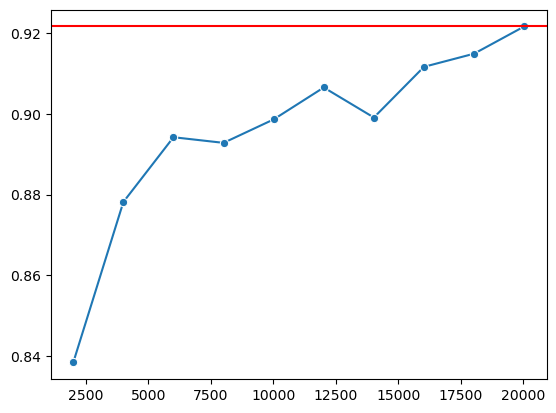

In [7]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_accuracies'], marker="o")
graph.axhline(modelling_metrics['test_accuracies'][-1], color='red')
plt.show()

In [8]:
modelling_metrics['test_accuracies']

[0.8383414861402283,
 0.8781737712555323,
 0.8942464477055672,
 0.8928488236664337,
 0.8986722571628232,
 0.9065921267179129,
 0.8991381318425343,
 0.9117167481947356,
 0.9149778709527138,
 0.9217330538085255]

In [9]:
modelling_metrics['subset_size']

[2003, 4006, 6009, 8012, 10015, 12018, 14021, 16024, 18027, 20030]

In [12]:
test_accuracies = modelling_metrics['test_accuracies']
mn = min(test_accuracies)
mx = max(test_accuracies)

norm = mx - mn

scaled_acc_values = [(val - mn)/norm for val in test_accuracies]
scaled_acc_values

[0.0,
 0.4776536312849164,
 0.670391061452513,
 0.6536312849162004,
 0.7234636871508372,
 0.8184357541899439,
 0.7290502793296081,
 0.8798882681564237,
 0.9189944134078213,
 1.0]

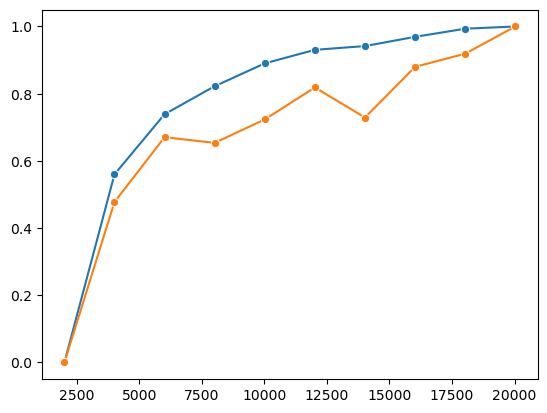

In [13]:
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_r2_values, marker="o")
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_acc_values, marker="o")
plt.show()

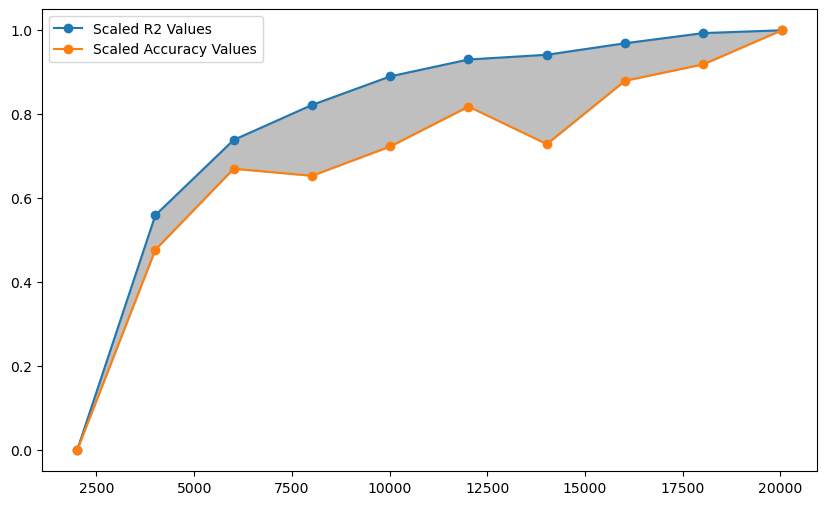

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(variance_metrics['subset_sizes'], scaled_r2_values, marker="o", label='Scaled R2 Values')
plt.plot(variance_metrics['subset_sizes'], scaled_acc_values, marker="o", label='Scaled Accuracy Values')
plt.fill_between(variance_metrics['subset_sizes'], scaled_r2_values, scaled_acc_values, color='gray', alpha=0.5)
plt.legend()
plt.show()